### idea 
user input his(personality test answers)and the system recommeds his matching Cats 


### metodology 
since our users don't have any prior preferences towards Cats(USER COLD START problem) we have to start with this:

#### version 1 
1. Finding **nearset user**: the system takes user input (personality test answers) then finds the nearsest user (the most similar one) from our DataSet
    - for better pridections : we filterd out users with staisfacton level blow 0.8 

2. we get the nearest user - **Connceted Cat** (from the DataSet)

####  version 2 
same as vesrion 1 but builds on it 

- based on the **Connceted Cat** the system recommends the nearset cat from Cat_dataset
- Adv:cats and adopters datasets are indepentant 


some notes: 

- there isn't any active learning,the system just recommends based on the Dataset (aka. the scale where every user get his recommended cat)  
- due to the DataSet setup, each user is exposed to one and only one Cat (Aka. each user rates one Cat). so we are forced to use "**user_based** collaborative filtering", in Addition satisfaction here is based on live -interaction between the Adopter and the cat for some time, so the satisfaction is a reliable scale 


## additional features:
- Maybe random pictures for cats then show them 




#### (this is a testing version ) - for relasing this we need 
- encapsulationg the version 2 into a proper function 
- function for inserting the questionare results then append them to the Dataset 
- user_names feature 

- finsihing Cats random names feature 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', 1000)

In [2]:
df = pd.read_excel('https://github.com/TechLabs-Berlin/wt21-pet-match/blob/main/data_set/data_cleaned/all_cleaned_num.xlsx?raw=true')

#df.describe()

In [3]:
df = df.set_index('id').drop(columns = 'breed')

In [4]:
df.head()

,cat_age,cat_gender,needs_outdoor,medical_conditions,behavioural_problems,cat_weight,likes_to_explore,playful,vocal,picked_up,timid,aggressive,adapts_quickly,prefers_alone,likes_stroke,tolerant_handled,friendly,fearful,adopter_gender,adopter_age,other_cats,outdoor_access,worries,easily_nervous,remains_calm,talkative,outgoing,reserved,new_ideas,values_artistic,active_imagination,rude,forgiving,considerate,thorough job,lazy,efficient,satisf_level
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6,1,2,2,1,3,4,4,3,2,3,1,3,2,4,3,4,5,2,2,2,2,5,4,4,4,4,4,2,5,3,1,4,5,4,4,4,1.00
1,2,2,2,1,1,3,4,4,1,4,3,3,2,3,4,3,5,2,2,2,0,2,5,5,5,4,3,5,4,3,4,3,5,5,5,1,5,1.00
2,5,1,1,1,1,4,5,3,4,2,2,3,4,3,3,2,3,3,2,1,0,1,5,0,0,4,0,2,3,0,4,0,4,0,5,0,0,0.85
3,4,2,2,1,1,4,3,4,3,5,4,2,2,2,5,4,4,4,2,1,1,2,5,5,2,4,3,4,4,5,5,4,5,4,3,4,3,1.00
4,3,2,2,1,1,5,4,3,5,2,3,1,4,3,4,3,4,3,2,2,3,2,4,4,4,2,3,4,3,3,3,3,4,4,4,4,4,1.00


## Random Cat-Names feature

###PENDING: Asssinging male names to male cat and female names to female  (untill now it is all male names)

In [5]:
# pip install names

import names
#df["cat_gender"] == 1  is 
#df.loc[(df["cat_gender"] == 1 )] 

In [6]:

def random_names(name):
    i = 0
    while i < len(df):
        if df["cat_gender"][df.index[i]] == 1:
            i= i+1
            return str(names.get_first_name(gender='male'))
        else:
            i= i+1
            return str(names.get_first_name(gender='female'))
        
            

In [7]:

df["cat_name"] = df.apply(random_names,axis=1)
df


,cat_age,cat_gender,needs_outdoor,medical_conditions,behavioural_problems,cat_weight,likes_to_explore,playful,vocal,picked_up,timid,aggressive,adapts_quickly,prefers_alone,likes_stroke,tolerant_handled,friendly,fearful,adopter_gender,adopter_age,other_cats,outdoor_access,worries,easily_nervous,remains_calm,talkative,outgoing,reserved,new_ideas,values_artistic,active_imagination,rude,forgiving,considerate,thorough job,lazy,efficient,satisf_level,cat_name
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6,1,2,2,1,3,4,4,3,2,3,1,3,2,4,3,4,5,2,2,2,2,5,4,4,4,4,4,2,5,3,1,4,5,4,4,4,1.00,Anthony
1,2,2,2,1,1,3,4,4,1,4,3,3,2,3,4,3,5,2,2,2,0,2,5,5,5,4,3,5,4,3,4,3,5,5,5,1,5,1.00,Gilbert
2,5,1,1,1,1,4,5,3,4,2,2,3,4,3,3,2,3,3,2,1,0,1,5,0,0,4,0,2,3,0,4,0,4,0,5,0,0,0.85,Frank
3,4,2,2,1,1,4,3,4,3,5,4,2,2,2,5,4,4,4,2,1,1,2,5,5,2,4,3,4,4,5,5,4,5,4,3,4,3,1.00,Toby
4,3,2,2,1,1,5,4,3,5,2,3,1,4,3,4,3,4,3,2,2,3,2,4,4,4,2,3,4,3,3,3,3,4,4,4,4,4,1.00,Robert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,12,2,1,1,1,3,5,5,3,4,4,1,4,2,5,4,5,2,2,5,2,1,2,1,4,4,4,2,3,4,3,1,5,5,4,1,4,1.00,Charles
3327,7,1,2,1,1,3,5,4,3,4,3,1,4,1,5,5,4,2,2,4,0,2,2,1,4,3,4,4,5,5,5,2,5,5,4,4,5,1.00,Frank
3328,4,1,1,1,1,3,5,5,5,5,1,1,5,2,5,5,5,1,2,1,3,1,5,5,3,3,2,4,5,5,5,4,5,5,3,5,4,1.00,Roberto


In [8]:
## not working feature /got postponed for now 

In [9]:
### I couldnt fully assign girl names to female cats 
def random_names_male(name):
    return str(names.get_first_name(gender='male'))

def random_names_female(name):
    return str(names.get_first_name(gender='female'))

#df_male = df.loc[(df["cat_gender"] == 1)]
#df_male["cat_name"] = df_male.apply(random_names_male,axis=1)

In [10]:
#df_female = df.loc[(df["cat_gender"] == 2)]
#df_female["cat_name"] = df_female.apply(random_names_female,axis=1)

In [11]:
## tring to add female and male names ... i manged to add them  however i missed with the order using "merge"
#dfnames = pd.concat([df_male["cat_name"], df_female["cat_name"]], axis = 1 ) 
#dfnames = df_male.append(df_female, sort=False)
#dfnames

## filtering out the unstisfied users 

<AxesSubplot:title={'center':'Satisfaction Distribution'}>

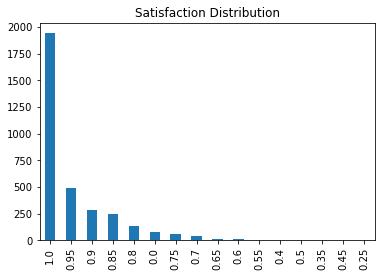

In [12]:
df['satisf_level'].value_counts().plot(kind='bar',title='Satisfaction Distribution' ,label= '.')


- nearly 

In [19]:
df['satisf_level'].value_counts(normalize = True)

1.00    0.582408
0.95    0.147403
0.90    0.085860
0.85    0.075053
0.80    0.039928
0.00    0.024917
0.75    0.018613
0.70    0.011408
0.65    0.003903
0.60    0.003603
0.55    0.002402
0.40    0.001501
0.50    0.001501
0.35    0.000600
0.45    0.000600
0.25    0.000300
Name: satisf_level, dtype: float64

- nearly 58% are fully staisfied (satisfaction = 1), while (~10%) are blew 0.8 satisfaction.
- since the recommender needs the users and Adopters to be high satisfied we choose to remove subjects with satisfaction less than 0.8 

In [21]:
df_happy = df.loc[df["satisf_level"] > 0.8].drop(columns=["satisf_level"]).reset_index(drop=True)
df_happy.shape

(2967, 38)

## Finding nearest user ( using correlation matrix )

In [22]:
# setting up a subset for the users_only features 
df_adopters = df_happy.loc[:, "adopter_gender":"efficient"]
df_adopters

,adopter_gender,adopter_age,other_cats,outdoor_access,worries,easily_nervous,remains_calm,talkative,outgoing,reserved,new_ideas,values_artistic,active_imagination,rude,forgiving,considerate,thorough job,lazy,efficient
0,2,2,2,2,5,4,4,4,4,4,2,5,3,1,4,5,4,4,4
1,2,2,0,2,5,5,5,4,3,5,4,3,4,3,5,5,5,1,5
2,2,1,0,1,5,0,0,4,0,2,3,0,4,0,4,0,5,0,0
3,2,1,1,2,5,5,2,4,3,4,4,5,5,4,5,4,3,4,3
4,2,2,3,2,4,4,4,2,3,4,3,3,3,3,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,2,5,2,1,2,1,4,4,4,2,3,4,3,1,5,5,4,1,4
2963,2,4,0,2,2,1,4,3,4,4,5,5,5,2,5,5,4,4,5
2964,2,1,3,1,5,5,3,3,2,4,5,5,5,4,5,5,3,5,4
2965,2,3,1,1,4,4,4,1,5,2,3,5,4,4,1,5,5,2,5


In [23]:
# create pivot table to study the user and book relation
df_pivot=df_adopters.transpose()
df_pivot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,...,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2531,2532,2533,2534,2535,2536,2537,2538,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548,2549,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647,2648,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658,2659,2660,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700,2701,2702,2703,2704,2705,2706,2707,2708,2709,2710,2711,2712,2713,2714,2715,2716,2717,2718,2719,2720,2721,2722,2723,2724,2725,2726,2727,2728,2729,2730,2731,2732,2733,2734,2735,2736,2737,2738,2739,2740,2741,2742,2743,2744,2745,2746,2747,2748,2749,2750,2751,2752,2753,2754,2755,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783,2784,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799,2800,2801,2802,2803,2804,2805,2806,2807,2808,2809,2810,2811,2812,2813,2814,2815,2816,2817,2818,2819,2820,2821,2822,2823,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847,2848,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,2868,2869,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879,2880,2881,2882,2883,2884,2885,2886,2887,

In [24]:
##to cheak no. of people who didnt fill at least half of the questionnare , only 75 persons so it is negegable 

df_pivot[df_pivot==0].apply(lambda x: x.count()>5).value_counts()

False    2892
True       75
dtype: int64

In [25]:
x=df_pivot.values.T  
x.shape

(2967, 19)

In [26]:
corr_mat = np.corrcoef(x)

###another methoud using Dataframe 
#df_matrix= df_pivot.corr(method='pearson')
#df_matrix

### Recommendation for Adopter (enter value)

In [27]:
Adopter_names = df_pivot.columns
Adopter_list = list(Adopter_names)
Adopter_index = Adopter_list.index(8) 

## users are named with numbers for now 

In [36]:
corr_Adopter = corr_mat[Adopter_index] 
corr_Adopter.shape

print("the nearest adopters to ",Adopter_index ," are")
near_adopter =list(Adopter_names[(corr_Adopter<1.0) & (corr_Adopter>0.8)][1:])
print("the recommender could find  ",len(near_adopter)," matches to user of ID",Adopter_index)

the nearest adopters to  8  are
the recommender could find   314  matches to user of ID 8


### get their connceted cats 

this approch is not the best, as we recommend cats from our offline Data set ... it is better to get cats from separte Dataset (recommend 2 ) 

In [37]:
print("the best 10 Cats to user ",Adopter_index ," are")

df["cat_name"][df.index[near_adopter][0:10]]

the best 10 Cats to user  8  are


id
27     William
37       Angel
38     William
45      Claude
48      Walter
74       Oscar
77        Mark
110    Michael
113    Timothy
122      Frank
Name: cat_name, dtype: object

## Result of recommendation 1 (version 1) 

In [103]:
 def recommend_cat(df_pivot, corr_mat):
    name=int (input("Enter the Adopter name you want to match: ")) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list = list(Adopter_names)
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index]
            near_adopter =list(Adopter_names[(corr_Adopter<1.0) & (corr_Adopter>0.8)][0:])
            print("Recommendation are")
            print(df_happy["cat_name"][df_happy.index[near_adopter][0:10]])
        

        else:
            name=" "+name
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index]
            near_adopter =list(Adopter_names[(corr_Adopter<1.0) & (corr_Adopter>0.8)][0:])
            print("Recommendation are")
            print(df_happy["cat_name"][df_happy.index[near_adopter][0:10]])
    except:
        print("Enter the Adopter Name Again")
        recommend_cat(df_pivot,corr_mat)    

In [104]:
recommend_cat(df_pivot, corr_mat)

Enter the Adopter name you want to match: 20
Recommendation are
8        Thomas
16      Michael
20         Fred
37          Don
48       Donald
128      Joseph
161     Raymond
170         Joe
175       Ivory
197    Jonathan
Name: cat_name, dtype: object


### find  nearset Cat using (correlation matrix of cat for better results)
to match the separtion between cats and adopter Dataset 

In [39]:
## note: cat names are not added ( maybe in later stage)

df_cats = df_happy.loc[:, "cat_age":"fearful"] 
df_cats

,cat_age,cat_gender,needs_outdoor,medical_conditions,behavioural_problems,cat_weight,likes_to_explore,playful,vocal,picked_up,timid,aggressive,adapts_quickly,prefers_alone,likes_stroke,tolerant_handled,friendly,fearful
0,6,1,2,2,1,3,4,4,3,2,3,1,3,2,4,3,4,5
1,2,2,2,1,1,3,4,4,1,4,3,3,2,3,4,3,5,2
2,5,1,1,1,1,4,5,3,4,2,2,3,4,3,3,2,3,3
3,4,2,2,1,1,4,3,4,3,5,4,2,2,2,5,4,4,4
4,3,2,2,1,1,5,4,3,5,2,3,1,4,3,4,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,12,2,1,1,1,3,5,5,3,4,4,1,4,2,5,4,5,2
2963,7,1,2,1,1,3,5,4,3,4,3,1,4,1,5,5,4,2
2964,4,1,1,1,1,3,5,5,5,5,1,1,5,2,5,5,5,1
2965,1,1,1,1,1,3,4,5,3,5,4,3,5,1,5,5,5,4


In [40]:
df_pivot_cat=df_cats.transpose()
df_pivot_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,...,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2531,2532,2533,2534,2535,2536,2537,2538,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548,2549,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647,2648,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658,2659,2660,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700,2701,2702,2703,2704,2705,2706,2707,2708,2709,2710,2711,2712,2713,2714,2715,2716,2717,2718,2719,2720,2721,2722,2723,2724,2725,2726,2727,2728,2729,2730,2731,2732,2733,2734,2735,2736,2737,2738,2739,2740,2741,2742,2743,2744,2745,2746,2747,2748,2749,2750,2751,2752,2753,2754,2755,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783,2784,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799,2800,2801,2802,2803,2804,2805,2806,2807,2808,2809,2810,2811,2812,2813,2814,2815,2816,2817,2818,2819,2820,2821,2822,2823,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847,2848,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,2868,2869,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879,2880,2881,2882,2883,2884,2885,2886,2887,

In [ ]:
##to cheak no. of people who didnt fill at least half of the questionnare 
#df_pivot_cat[df_pivot==0].apply(lambda x: x.count()>5).value_counts()

In [41]:
x_cat=df_pivot_cat.values.T  
corr_mat_cat = np.corrcoef(x_cat)

In [105]:
##adopter things 
Adopter_names = df_pivot.columns
Adopter_list = list(Adopter_names)
Adopter_index = Adopter_list.index(20) 
## cat things 


corr_Adopter = corr_mat[Adopter_index] 
corr_Adopter.shape

print("the nearest adopters to ",Adopter_index ," is")
near_adopter_optiumised =list(Adopter_names[(corr_Adopter<1.0) & (corr_Adopter>0.8)][0:1])
#cheking Adopter cats 
df_happy["cat_name"][df_happy.index[near_adopter_optiumised][0:10]]



the nearest adopters to  20  is


8    Thomas
Name: cat_name, dtype: object

In [106]:
##finding simlar cats to the best one 
best_cat = df.index[near_adopter_optium].tolist()
#recommend the 10 simlar cats 
Cat_id = df_pivot_cat.columns
Cat_list = list(Cat_id)
corr_Cats = corr_mat_cat [best_cat[0]]

print("the nearest 10 cats to ",Adopter_index," are")
near_Cat = near_adopter_optium + list(Cat_id[(corr_Cats<1.0) & (corr_Cats>0.8)][0:]) ## for debugging reasons i added the best cat manaully  
df_happy["cat_name"][df_happy.index[near_Cat][0:10]]



the nearest 10 cats to  20  are


8      Thomas
5     Alfredo
7     Woodrow
8      Thomas
11      Peter
13       Dave
17       Sean
19      Steve
20       Fred
21      James
Name: cat_name, dtype: object

In [ ]:
recommend_cat(df_pivot, corr_mat)


# def (recommender Version 2 ) 

In [107]:
 def recommend_cat_2(df_pivot, corr_mat,df_pivot_cat,corr_mat_cat ):
    name=int (input("Enter the Adopter name you want to match: ")) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list = list(Adopter_names)
    Cat_id = df_pivot_cat.columns
    Cat_list = list(Cat_id)

    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index]
            print("the nearest cat to ",name," in the Dataset is")
            near_adopter_optium  =list(Adopter_names[(corr_Adopter<1.0) & (corr_Adopter>0.8)][0:1])
            print(df_happy["cat_name"][df_happy.index[near_adopter_optium][0:10]])
            best_cat = df.index[near_adopter_optium].tolist()
            #recommend the 10 simlar cats 
            corr_Cat = corr_mat_cat [best_cat[0]]
            print("the nearest 10 cats to ",Adopter_index,"including (best cat from Dataset)are")
            near_Cat = near_adopter_optium + list(Cat_id[(corr_Cat<1.0) & (corr_Cat>0.8)][0:]) ## prints cat ID in an list
            print(df_happy["cat_name"][df_happy.index[near_Cat][0:10]]) ## this part for printing users names 
          
        
    except:
        print("Enter the Adopter Name Again")
        recommend_cat(df_pivot,corr_mat)  
        



### comparing the results 

In [108]:
recommend_cat(df_pivot, corr_mat)

Enter the Adopter name you want to match: 15
Recommendation are
171     Richard
548      Thomas
640      Donald
1055    William
1109     Calvin
1172     Walter
1249       Glen
1724     Norman
1833    Raymond
1946     Dennis
Name: cat_name, dtype: object


In [109]:
recommend_cat_2(df_pivot, corr_mat,df_pivot_cat,corr_mat_cat )

Enter the Adopter name you want to match: 15
the nearest cat to  15  in the Dataset is
171    Richard
Name: cat_name, dtype: object
the nearest 10 cats to  15 including (best cat from Dataset)are
171    Richard
7      Woodrow
11       Peter
16     Michael
21       James
24      George
31       Larry
36       David
40      Claude
51      Angelo
Name: cat_name, dtype: object


## Evaluation 
- for recommender evaluation, we used (accurency, recall , Covrage Tests)

In [ ]:
recommend_cat_better(df_pivot, corr_mat)

### 